## 分析的问题

本文试图对“棒球赛数据集”进行分析，并提出以下问题：  
1、团队的年度排名和哪些指标明显相关？  
2、棒球队员的工资平均水平呈现一个怎样的年度增长趋势？  
3、工资水平高的队员在一些具体的衡量指标上是否表现的更加突出？


## 读取文件

具体的数据集可以从<a id='the_destination' href=http://www.seanlahman.com/baseball-archive/statistics/>此处网站</a>下载，本文用到的文件主要有三个：Salaries.csv、Teams.csv以及Batting.csv。  
下面的代码使用pandas读取本地的文件。运行时请注意修改为文件所在的本地路径。

In [70]:
import pandas as pd

# 文件路径，运行时请注意修改为文件所在的路径。
salaries_file = '../../../Data/baseballdatabank-2017.1/core/Salaries.csv'
teams_file = '../../../Data/baseballdatabank-2017.1/core/Teams.csv'
batting_file = '../../../Data/baseballdatabank-2017.1/core/Batting.csv'

# 读取文件
salaries_df = pd.read_csv(salaries_file)
teams_df = pd.read_csv(teams_file)
batting_df = pd.read_csv(batting_file)

## 团队数据相关指标分析

本部分通过相关系数的计算来分析团队的年度排名和哪些指标具有相关性。所使用的数据为Teams.csv文件。  
首先，我们来定义一个通用的函数来计算相关系数。

In [71]:
def correlation(x, y):
    '''
    用于相关系数的计算
    '''
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    return (std_x * std_y).mean()

之后，我们需要对数据进行清洗，此处使用的1969年之后的数据，之前的数据有部分指标为空值。

In [72]:
new_teams_df = teams_df[teams_df['yearID'] >= 1969]

然后，我们选取了一些关键的指标，并标明了其含义。

In [73]:
# 排名 (Rank)
rank = new_teams_df['Rank']
# 得分 (R)
r = new_teams_df['R']
# 胜场 (W)
w = new_teams_df['W']
# 胜率
bl = new_teams_df['W'] / new_teams_df['G']
# 防御率（ERA）
era = new_teams_df['ERA']
# 自责分（ER）
er = new_teams_df['ER']
# 救援点（SV）
sv = new_teams_df['SV']
# 完投（CG）
cg = new_teams_df['CG']
# 完封（SHO）
sho = new_teams_df['SHO']
# 守备失误（E）
e = new_teams_df['E']
# 防守占比 (FP)
fp = new_teams_df['FP']
# 打数（AB）
ab = new_teams_df['AB']
# 安打（H）
h = new_teams_df['H']
# 全垒打（HR）
hr = new_teams_df['HR']
# 保送（BB）
bb = new_teams_df['BB']
# 触身球（HBP）
hbp = new_teams_df['HBP']
# 牺牲打（SF）
sf= new_teams_df['SF']


接下来是相关系数的计算：

In [74]:
print('Rank 与 R  的相关系数：' , correlation(rank, r))
print('Rank 与 W  的相关系数：' , correlation(rank, w))
print('Rank 与 H  的相关系数：' ,correlation(rank, h))
print('Rank 与 E  的相关系数：' , correlation(rank, e))
print('Rank 与 AB 的相关系数：' , correlation(rank, ab))
print('Rank 与 HR 的相关系数：' , correlation(rank, hr))
print('Rank 与 BL 的相关系数：' , correlation(rank, bl))
print('Rank 与 BB 的相关系数：' , correlation(rank, bb))
print('Rank 与 SF 的相关系数：' , correlation(rank, sf))
print('Rank 与 ER 的相关系数：' , correlation(rank, er))
print('Rank 与 SV 的相关系数：' , correlation(rank, sv))
print('Rank 与 CG 的相关系数：' , correlation(rank, cg))
print('Rank 与 FP 的相关系数：' , correlation(rank, fp))
print('Rank 与 SHO 的相关系数：' , correlation(rank, sho))
print('Rank 与 HBP 的相关系数：' , correlation(rank, hbp))
print('Rank 与 ERA 的相关系数：' , correlation(rank, era))

Rank 与 R  的相关系数： -0.4318534802690003
Rank 与 W  的相关系数： -0.7713182573344043
Rank 与 H  的相关系数： -0.23364062519983916
Rank 与 E  的相关系数： 0.3144276499813784
Rank 与 AB 的相关系数： -0.03867690637782868
Rank 与 HR 的相关系数： -0.32810855124913346
Rank 与 BL 的相关系数： -0.855989344992027
Rank 与 BB 的相关系数： -0.27967953536298024
Rank 与 SF 的相关系数： -0.21456660566958718
Rank 与 ER 的相关系数： 0.3266838604571441
Rank 与 SV 的相关系数： -0.4498029162659929
Rank 与 CG 的相关系数： 0.04678388489262877
Rank 与 FP 的相关系数： -0.3417737773284375
Rank 与 SHO 的相关系数： -0.3101880706551662
Rank 与 HBP 的相关系数： -0.11500112096524762
Rank 与 ERA 的相关系数： 0.36361492493634656


通过上面的计算可以看出，团队的年度排名（Rank）与胜利场数（W）、胜率（BL）具有明显的相关性，这点很好解释，胜率越高，排名自然越靠前。此外，年度排名（Rank）还与得分情况（R）、全垒打（HR）、救援点（SV）、防守占比（FP）、防御率（ERA）等具有一定的相关性。也可以看出，年度排名（Rank）与打数（AB）以及完投（CG）基本上不具有相关性。

## 年度平均工资水平

本部分分析球员的年度平均工资水平，所使用的数据为Salaries.csv文件。该文件的数据较为完整，不需要我们进行额外的清洗。我们先对数据按年进行分组，之后对每个分组计算工资的均值，并给出对应的的一般性统计。

In [75]:
# 按年分组
grouped_data_by_year = salaries_df.groupby(['yearID'])
# 计算工资均值
mean_salaries_df_by_year = grouped_data_by_year.mean()
mean_salaries_df_by_year.head()

,salary
yearID,
1985,476299.447273
1986,417147.043360
1987,434729.465710
1988,453171.076923
1989,506323.081575


In [76]:
# 一般描述统计
mean_salaries_df_by_year.describe()

,salary
count,3.200000e+01
mean,2.054952e+06
std,1.278222e+06
min,4.171470e+05
25%,9.739697e+05
50%,2.136413e+06
75%,3.171800e+06
max,4.396410e+06


为了更好的观察，我们将年度工资平均水平绘制为图形。

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Average Salary')

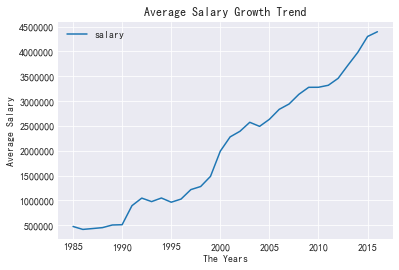

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 支持中文
# sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

%pylab inline
mean_salaries_df_by_year.plot()
plt.title('Average Salary Growth Trend')      
plt.xlabel('The Years')  
plt.ylabel('Average Salary')  


由上图可以看出，球员的工资水平按年呈现一个日益增长的趋势。

## 不同工资水平球员指标对比

本部分用来分析不同工资水平的棒球球员的一些关键衡量指标。用到的文件为 Batting.csv与Salaries.csv。  
如上所述，球员的工资水平随着年度呈现一个日益增长的趋势，由于时间因素的存在，衡量不同年度的工资水平意义不大。因此，我们需要在同一个年度内对工资水平进行划分，以比较同一年度内不同工资水平的球员。  
我们先来定义两个函数用来划分工资水平，如下：

In [78]:
# 用于series
def pct_rank_qcut(series, n):
    edges = pd.Series([float(i) / n for i in range(n + 1)])
    f = lambda x: (edges >= x).values.argmax()
    return series.rank(pct=1).apply(f)

# 用于DataFrame
def new_pct_rank_qcut(df, n):
    edges = pd.Series([float(i) / n for i in range(n + 1)])
    f = lambda x: (edges >= x).values.argmax()
    df['levelName'] = df['salary'].rank(pct=1).apply(f)
    return df

我们对salaries_df先按年进行分组，之后应用new_pct_rank_qcut函数，并重置索引。此处我们取n=3将工资水平划分为三档。

In [79]:
ngrouped_data = salaries_df.groupby(['yearID']).apply(lambda df: new_pct_rank_qcut(df, 3)).reset_index() 
ngrouped_data.head()

,index,yearID,teamID,lgID,playerID,salary,levelName
0,0,1985,ATL,NL,barkele01,870000,3
1,1,1985,ATL,NL,bedrost01,550000,2
2,2,1985,ATL,NL,benedbr01,545000,2
3,3,1985,ATL,NL,campri01,633333,3
4,4,1985,ATL,NL,ceronri01,625000,3


由上面可以看出，工资水平最高的levelName为3，自然，最低的为1，中间的为2。接下来我们分别构造三个数据集来对应这三种工资水平。

In [80]:
# 高档
high_salary_group = ngrouped_data[ngrouped_data['levelName'] == 3]
# 中档
middle_salary_group = ngrouped_data[ngrouped_data['levelName'] == 2]
# 低档
low_salary_group = ngrouped_data[ngrouped_data['levelName'] == 1]

接下来，需要将上面的三个数据集与某个具体的指标数据集（这里我们选取的是进攻数据batting_df）进行联表操作，构造新的数据集。  
先编写用来联表的函数，如下：

In [81]:
def new_combine_dfs(df1, df2, on_list):   
   
    return df1.merge(df2, on=on_list, how='inner' )

联表，构造新的数据，如下：

In [82]:
# 联立条件
on_list = ['playerID', 'yearID', 'teamID', 'lgID']

# 高档工资球员的进攻数据
high_batting_df = new_combine_dfs(high_salary_group, batting_df, on_list)
print(len(high_batting_df))

# 中档工资球员的进攻数据
middle_batting_df = new_combine_dfs(middle_salary_group, batting_df, on_list)
print(len(middle_batting_df))

# 低档工资球员的进攻数据
low_batting_df = new_combine_dfs(low_salary_group, batting_df, on_list)
print(len(low_batting_df))

8488
8457
8194


定义一个新的函数，对关键的一些指标进行筛选。

In [83]:
def key_batting_indexes(df):
    '''
    选择关键的进攻指标，构造新的用于DataFrame
    '''
    yearID = df['yearID']
    salary = df['salary']
    # 打数（AB）
    ab = df['AB']
    # 得分（R）
    r = df['R']
    # 安打（H）
    h = df['H']
    # 全垒打（HR）
    hr = df['HR']
    # 打点（RBI）
    rbi = df['RBI']
    # 保送（BB）
    bb = df['BB']
    # 触身球（HBP）
    hbp = df['HBP']
    # 牺牲打（SF）
    sf= df['SF']
    # 打击率（BA）
    ba = h / ab
    # 上垒率（OBP）
    obp = (h + bb + hbp) / (ab + bb + hbp + sf)

    ndf = df[['yearID','AB','R','HR','H','BB','HBP','SF','salary']].copy()
    ndf.loc[:,'BA'] = ba
    ndf['OBP'] = obp

    return ndf

In [84]:
# 高档工资球员关键指标
high_ndf = key_batting_indexes(high_batting_df)
# 中档档工资球员关键指标
middle_ndf = key_batting_indexes(middle_batting_df)
# 低档工资球员关键指标
low_ndf = key_batting_indexes(low_batting_df)

需要对上面新生成的球员关键指标数据进行清洗。因为这些数据里面包含了一些值为NaN的数据，这是由于计算打击率（BA）所用公式ba = h / ab 以及计算上垒率（OBP）所用公式obp = (h + bb + hbp) / (ab + bb + hbp + sf) 会出现数字零作为分母的情况。

In [85]:
# 数据清洗
low_ndf = low_ndf[ ~(pd.isnull(low_ndf['BA'])) & ~(pd.isnull(low_ndf['OBP']))]
middle_ndf = middle_ndf[ ~(pd.isnull(middle_ndf['BA'])) & ~(pd.isnull(middle_ndf['OBP']))]
high_ndf = high_ndf[ ~(pd.isnull(high_ndf['BA'])) & ~(pd.isnull(high_ndf['OBP']))]

在上面的构造的数据集中我们构造了多个关键指标，目的是为了方便进行选择，这些指标的分析都类似。此处我们仅选择两个重要的指标打击率（BA）和上垒率（OBP）进行分析。下面是关于这两个指标的说明：  
打击率（BA）：一名打者的安打数除以打数得到打击率。上垒率（OBP）：上垒率顾名思义就是一名打者上垒的比例。计算公式为一名打者的安打数加保送数加触身球数的和除以他的打数加保送数加触身球数加牺牲打数的和。用通俗的话说，上垒率也就是一名打者的不出局率。上垒率被认为是衡量一名打者对球队贡献最为直观的数据，因为最好的打者就是不制造过多出局数的打者。  
接下来我们先来按年分组计算关键指标的均值，然后筛选我们需要的BA与OBP两列，并重置索引按年排序。

In [86]:
# 数据计算与筛选以及排序
low_data = low_ndf.groupby(['yearID']).mean().loc[:,['BA','OBP']].reset_index().sort_values(['yearID']) 
middle_data = middle_ndf.groupby(['yearID']).mean().loc[:,['BA','OBP']].reset_index().sort_values(['yearID'])
high_data = high_ndf.groupby(['yearID']).mean().loc[:,['BA','OBP']].reset_index().sort_values(['yearID'])

# 查看数据
high_data.head()

,yearID,BA,OBP
0,1985,0.231821,0.293565
1,1986,0.240839,0.308935
2,1987,0.230667,0.298110
3,1988,0.220202,0.279070
4,1989,0.232376,0.290547


构造BA指标数据集

In [87]:
import numpy as np

ba_group = pd.DataFrame({
    
    'low_salary': np.array(low_data['BA']).tolist(),
    'middle_salary': np.array(middle_data['BA']).tolist(),
    'high_salary': np.array(high_data['BA']).tolist()
}, index=np.array(low_data['yearID']).tolist())

ba_group.head()

,high_salary,low_salary,middle_salary
1985,0.231821,0.213639,0.214328
1986,0.240839,0.210021,0.216145
1987,0.230667,0.217413,0.220950
1988,0.220202,0.203822,0.214991
1989,0.232376,0.209948,0.219959


In [88]:
# 一般性统计
ba_group.describe()

,high_salary,low_salary,middle_salary
count,32.000000,32.000000,32.000000
mean,0.226501,0.196139,0.208993
std,0.013258,0.013878,0.011256
min,0.202210,0.173017,0.188276
25%,0.219983,0.184543,0.200381
50%,0.226330,0.197145,0.206870
75%,0.232967,0.206580,0.216156
max,0.251212,0.224959,0.228468


绘制图形，如下：

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'The Value')

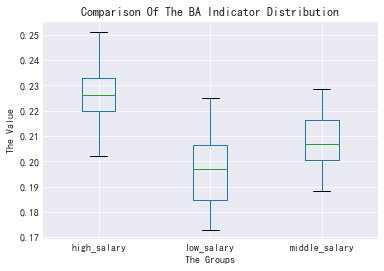

In [89]:
%pylab inline
ba_group.boxplot()

plt.title('Comparison Of The BA Indicator Distribution')      
plt.xlabel('The Groups')  
plt.ylabel('The Value') 

以上使用箱形图来可视化了不同工资水平球员的BA指标分布情况，下面再来看一下折线图。如下：

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'BA')

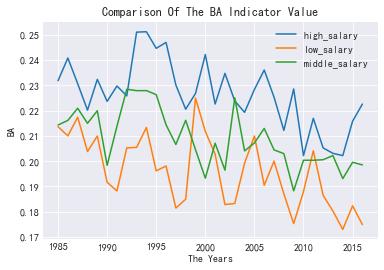

In [90]:
%pylab inline
ba_group.plot()
plt.title('Comparison Of The BA Indicator Value')      
plt.xlabel('The Years')  
plt.ylabel('BA')  

构造OBP指标数据集

In [91]:
obp_group = pd.DataFrame({
    
    'low_salary': np.array(low_data['OBP']).tolist(),
    'middle_salary': np.array(middle_data['OBP']).tolist(),
    'high_salary': np.array(high_data['OBP']).tolist()
}, index=np.array(low_data['yearID']).tolist())

obp_group.head()

,high_salary,low_salary,middle_salary
1985,0.293565,0.268720,0.276772
1986,0.308935,0.274036,0.275717
1987,0.298110,0.267808,0.279405
1988,0.279070,0.257116,0.274491
1989,0.290547,0.264630,0.280261


In [92]:
# 一般性统计
obp_group.describe()

,high_salary,low_salary,middle_salary
count,32.000000,32.000000,32.000000
mean,0.286467,0.248121,0.264580
std,0.016373,0.016561,0.012483
min,0.253727,0.220456,0.246198
25%,0.277548,0.233666,0.255076
50%,0.287008,0.250037,0.259525
75%,0.294826,0.261849,0.275980
max,0.314752,0.280580,0.286613


绘图，先来看一下不同工资水平球员的OBP指标分布情况，如下：

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'The Value')

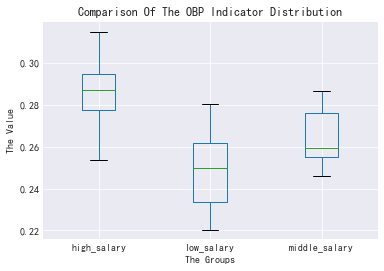

In [93]:
%pylab inline
obp_group.boxplot()

plt.title('Comparison Of The OBP Indicator Distribution')      
plt.xlabel('The Groups')  
plt.ylabel('The Value') 

下面再来看一下折线图。如下：

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'OBP')

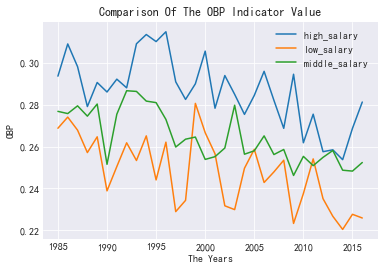

In [94]:
%pylab inline
obp_group.plot()

plt.title('Comparison Of The OBP Indicator Value')      
plt.xlabel('The Years')  
plt.ylabel('OBP')  

无论是从上面的描述行统计，还是从上面绘制的图形，都可以看出，同一年度工资水平高的球员的关键进攻指标要优于同一年度工资水平低的球员。此外，也可以看出，这两个绘制的图形形状类似，我们不妨计算一下同一年度工资水平高的球员的这两个指标的相关系数来看一下。

In [95]:
print(correlation(high_ndf['OBP'], high_ndf['BA']))

0.9271063143381124


计算的结果表明这两个指标是高度相关的。

## 结论

本文通过相关系数的计算分析了团队的年度排名和一些具有的指标的相关性，发现团队的年度排名（Rank）与胜利场数（W）、胜率（BL）具有明显的相关性，与得分情况（R）、全垒打（HR）救援点（SV）、防守占比（FP）、防御率（ERA）等具有一定的相关性。本文分析了球员的年度平均工资水平，发现球员的工资水平按年呈现一个日益增长的趋势。还分析了同一年度不同工资水平的棒球球员的一些关键衡量指标，发现同一年度工资水平高的球员的关键进攻指标要优于同一年度工资水平低的球员。  
当然，受一些因素的影响，分析结果在展示时可能会有一些限制；分析也不能表明或暗示一个因素变化必然会导致另一个因素发生变化；此外，一些结论也有可能具有时效性。特此说明。